In [2]:
import glob,os
import pandas as pd
import utils.data_utils as du
import utils.visualization_utils as vu
from matplotlib import pyplot as plt

In [3]:
path_raw = '../DES/data/'
path_preprocessed = './dump/preprocessed/'

# load data and process if necessary
df_real, df_fake = du.load_data(path_raw,path_preprocessed,debug=True)

[Loading preprocessed data ./dump/preprocessed//DES_preprocessed_phot.pickle] 
[Loading preprocessed data ./dump/preprocessed//Fake_preprocessed_phot.pickle] 


In [3]:
# group by SNID to obtain single peaks
df_real_group = df_real.groupby('SNID').mean()
df_fake_group = df_fake.groupby('SNID').mean()

In [4]:
# rename SNID
df_real_group['SNID'] = df_real_group.index
df_fake_group['SNID'] = df_fake_group.index

In [5]:
# select measured values
df_real_group = df_real_group[ (df_real_group['PRIVATE(DES_mjd_trigger)']>0) &   (df_real_group['PEAKMJD']>0)]
df_fake_group = df_fake_group[ (df_fake_group['PRIVATE(DES_mjd_trigger)']>0) &   (df_fake_group['PEAKMJD']>0)]

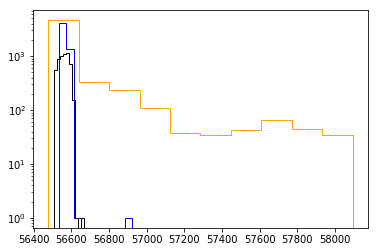

In [6]:
# plots fake
fig = plt.figure()
plt.hist(df_fake_group['PRIVATE(DES_mjd_trigger)'],histtype="step",color='blue')
plt.hist(df_fake_group['PEAKMJD'],histtype="step",color='orange')
plt.hist(df_fake_group['PRIVATE(DES_fake_peakmjd)'],histtype="step",color='black')
plt.yscale("log")

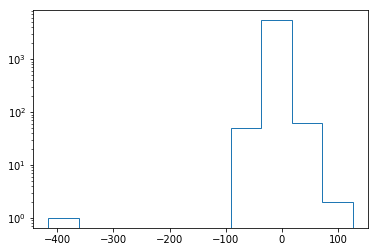

In [7]:
# looks like PEAKMJD is all over the place
# and the trigger is a better indicator
plt.hist(df_fake_group['PRIVATE(DES_fake_peakmjd)']-df_fake_group['PRIVATE(DES_mjd_trigger)'],histtype="step")
plt.yscale("log")

In [132]:
# how many outliers?
print(f"severely catastrophic: {len(df_fake_group[abs(df_fake_group['PRIVATE(DES_fake_peakmjd)']-df_fake_group['PRIVATE(DES_mjd_trigger)'])>200])} of {len(df_fake_group)}")
print(f">30 days: {len(df_fake_group[abs(df_fake_group['PRIVATE(DES_fake_peakmjd)']-df_fake_group['PRIVATE(DES_mjd_trigger)'])>30])} of {len(df_fake_group)} which is {int(len(df_fake_group[abs(df_fake_group['PRIVATE(DES_fake_peakmjd)']-df_fake_group['PRIVATE(DES_mjd_trigger)'])>30])/len(df_fake_group)*100)}%")

severely catastrophic: 1 of 5561
>30 days: 165 of 5561 which is 2%


Text(0, 0.5, 'DES_mjd_trigger')

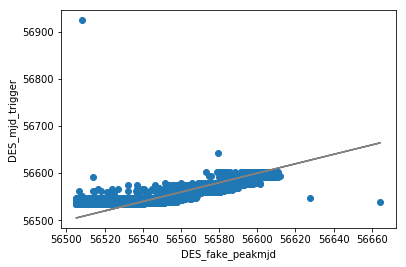

In [9]:
# how are outliers distributed?
plt.scatter(df_fake_group['PRIVATE(DES_fake_peakmjd)'],df_fake_group['PRIVATE(DES_mjd_trigger)'])
plt.plot(df_fake_group['PRIVATE(DES_fake_peakmjd)'],df_fake_group['PRIVATE(DES_fake_peakmjd)'],color = 'grey')
plt.xlabel('DES_fake_peakmjd')
plt.ylabel('DES_mjd_trigger')

In [10]:
# trigger is a better indicator than PEAKMJD but still not the best

In [187]:
# select events within windom -20<70 days
df_fake['delta_time'] = df_fake['MJD']-df_fake['PRIVATE(DES_mjd_trigger)']
df_fake['selection']=df_fake["delta_time"].apply(lambda x: 'True' if (x>0 and x<70) else ('True' if (x<=0 and x>-20) else 'False'))
df = df_fake[df_fake['selection']=='True']

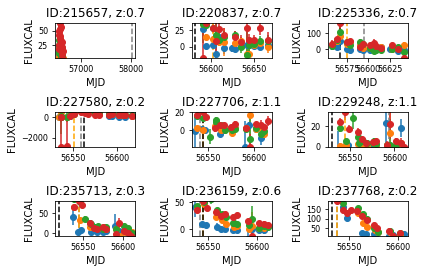

In [186]:
#plot some examples
import utils.visualization_utils as vu
import random
list_SNIDs = [df['SNID'].unique()[i] for i in sorted(random.sample(range(len(df['SNID'].unique())), 9))]
fig = plt.figure()
for i, sid in enumerate(list_SNIDs):
    ax = plt.subplot(3,3,i+1)
    vu.plot_single_lc(df,sid,ax)
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)

In [ ]:
# seems to be working, now how do I implement this before constructing the dataset. Or should I do this within dataset?
# there are not so many light-curves so maybe I can trim before
# or use my pip install!